# <center> **EDA PROJECT**</center>

# Project Context

1. This project focuses on understanding a global tourism and economic dataset sourced from Kaggle.
2. The dataset contains country-wise tourism indicators along with economic metrics recorded across multiple years.
3. It includes information such as tourism receipts, arrivals, departures, tourism expenditure, GDP, inflation, and employment.


In [1]:
## importing the libraries which are needed 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic

# Data understanding

In [2]:
## loading the dataset
df = pd.read_csv('world_tourism_economy_data.csv')

In [3]:
df

,country,country_code,year,tourism_receipts,tourism_arrivals,tourism_exports,tourism_departures,tourism_expenditures,gdp,inflation,unemployment
0,Aruba,ABW,1999,7.820000e+08,9.720000e+05,62.542949,NaN,9.495387,1.722905e+09,2.280372,NaN
1,Africa Eastern and Southern,AFE,1999,8.034209e+09,1.530938e+07,12.204030,NaN,7.760536,2.654293e+11,7.819865,NaN
2,Afghanistan,AFG,1999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Africa Western and Central,AFW,1999,1.443613e+09,3.897975e+06,3.974476,NaN,6.147291,1.394683e+11,0.372266,NaN
4,Angola,AGO,1999,3.100000e+07,4.500000e+04,0.583858,NaN,2.489638,6.152923e+09,248.195902,NaN
...,...,...,...,...,...,...,...,...,...,...,...
6645,Kosovo,XKX,2023,NaN,NaN,NaN,NaN,NaN,1.046822e+10,4.944324,NaN
6646,"Yemen, Rep.",YEM,2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6647,South Africa,ZAF,2023,NaN,NaN,NaN,NaN,NaN,3.806993e+11,6.073909,32.098
6648,Zambia,ZMB,2023,NaN,NaN,NaN,NaN,NaN,2.757796e+10,10.884532,NaN


In [4]:
df.head() ## to understand the structure of the data

,country,country_code,year,tourism_receipts,tourism_arrivals,tourism_exports,tourism_departures,tourism_expenditures,gdp,inflation,unemployment
0,Aruba,ABW,1999,7.820000e+08,9.720000e+05,62.542949,NaN,9.495387,1.722905e+09,2.280372,NaN
1,Africa Eastern and Southern,AFE,1999,8.034209e+09,1.530938e+07,12.204030,NaN,7.760536,2.654293e+11,7.819865,NaN
2,Afghanistan,AFG,1999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Africa Western and Central,AFW,1999,1.443613e+09,3.897975e+06,3.974476,NaN,6.147291,1.394683e+11,0.372266,NaN
4,Angola,AGO,1999,3.100000e+07,4.500000e+04,0.583858,NaN,2.489638,6.152923e+09,248.195902,NaN


# checking datatypes

In [5]:
## The next step is to verify whether each column has the appropriate data type assigned.
## We can also classify whether the column is a categorical column or a numerical column
df.dtypes

country                  object
country_code             object
year                      int64
tourism_receipts        float64
tourism_arrivals        float64
tourism_exports         float64
tourism_departures      float64
tourism_expenditures    float64
gdp                     float64
inflation               float64
unemployment            float64
dtype: object

In [6]:
## From the above output, we can observe that the data types are correctly assigned.
## We can also determine that there are 2 categorical columns, 1 discrete numerical column and 8 continuous numerical columns 

# checking for duplicates

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
## no duplicates are found 


# checking for missing values

In [9]:
df.isna().sum()

country                    0
country_code               0
year                       0
tourism_receipts        2361
tourism_arrivals        1701
tourism_exports         2536
tourism_departures      4061
tourism_expenditures    2477
gdp                      226
inflation                982
unemployment            2992
dtype: int64

In [10]:
# We can see that there are no null values in the categorical and discrete numerical columns 

exclude_cols = ['country','country_code','year'] 

In [11]:
value_cols = df.columns.difference(exclude_cols)

In [12]:
value_cols

Index(['gdp', 'inflation', 'tourism_arrivals', 'tourism_departures',
       'tourism_expenditures', 'tourism_exports', 'tourism_receipts',
       'unemployment'],
      dtype='object')

In [13]:
dt = df.isna().groupby(df['country'])[value_cols].sum()
#This code counts missing values for each numerical column, grouped by country, by converting NaNs to boolean values and summing them.

In [14]:
dt

,gdp,inflation,tourism_arrivals,tourism_departures,tourism_expenditures,tourism_exports,tourism_receipts,unemployment
country,,,,,,,,
Afghanistan,1,10,25,25,12,12,12,19
Africa Eastern and Southern,0,0,4,25,4,4,4,25
Africa Western and Central,0,0,7,25,5,4,5,21
Albania,0,0,3,5,3,3,3,4
Algeria,0,0,3,3,9,9,9,7
...,...,...,...,...,...,...,...,...
West Bank and Gaza,0,0,3,25,3,5,5,2
World,0,0,4,4,4,4,4,10
"Yemen, Rep.",5,9,19,25,13,18,18,16


# handling missing values

In [15]:
### check if the countries have all 25 years of data missing

dt[dt[value_cols].eq(25).all(axis = 1)]

,gdp,inflation,tourism_arrivals,tourism_departures,tourism_expenditures,tourism_exports,tourism_receipts,unemployment
country,,,,,,,,
Gibraltar,25,25,25,25,25,25,25,25
"Korea, Dem. People's Rep.",25,25,25,25,25,25,25,25
Not classified,25,25,25,25,25,25,25,25


In [16]:
countries_to_drop = dt[dt[value_cols].eq(25).all(axis=1)].index

In [17]:
# The countries that have all 25 years of data missing are removed from the main dataframe
df = df[~df['country'].isin(countries_to_drop)]


In [18]:
dt.drop(labels = countries_to_drop,inplace = True)

In [19]:
#check if countries entire data in a column is missing

dt[dt[value_cols].eq(25).any(axis=1)]

,gdp,inflation,tourism_arrivals,tourism_departures,tourism_expenditures,tourism_exports,tourism_receipts,unemployment
country,,,,,,,,
Afghanistan,1,10,25,25,12,12,12,19
Africa Eastern and Southern,0,0,4,25,4,4,4,25
Africa Western and Central,0,0,7,25,5,4,5,21
American Samoa,4,25,6,25,25,25,23,22
Andorra,0,25,3,25,24,24,24,25
...,...,...,...,...,...,...,...,...
Viet Nam,0,0,3,25,9,7,7,3
Virgin Islands (U.S.),4,25,3,25,25,25,3,25
West Bank and Gaza,0,0,3,25,3,5,5,2


In [20]:
countries_to_drop_1 = dt[dt[value_cols].eq(25).any(axis=1)].index

In [21]:
# drop the countries which have a column with 25 rows of missing values
df=df[~df['country'].isin(countries_to_drop_1)]

In [22]:
df.isna().sum()

country                   0
country_code              0
year                      0
tourism_receipts        745
tourism_arrivals        582
tourism_exports         794
tourism_departures      993
tourism_expenditures    773
gdp                      12
inflation               126
unemployment            684
dtype: int64

In [23]:
df = df.sort_values(['country','year'])

In [24]:
# Fill missing values using country-wise linear interpolation
# This estimates missing values based on year-to-year trends
num_cols = value_cols

df[num_cols] = (df.groupby('country')[num_cols].transform(lambda x: x.interpolate(method='linear')))


In [25]:
df.isna().sum()

country                   0
country_code              0
year                      0
tourism_receipts        112
tourism_arrivals         95
tourism_exports         143
tourism_departures      311
tourism_expenditures    143
gdp                       0
inflation                70
unemployment            127
dtype: int64

In [26]:
# Interpolation cannot fill missing values at the beginning or end of a time series.
# Forward fill and backward fill are used to handle these edge-year missing values
# within each country.
df[num_cols] = (df.groupby('country')[num_cols].transform(lambda x: x.ffill().bfill()))


In [27]:
df.isna().sum()

country                 0
country_code            0
year                    0
tourism_receipts        0
tourism_arrivals        0
tourism_exports         0
tourism_departures      0
tourism_expenditures    0
gdp                     0
inflation               0
unemployment            0
dtype: int64

In [28]:
grouped_countries = ["World","High income","OECD members","Post-demographic dividend","Early-demographic dividend","Europe & Central Asia","Europe & Central Asia (IDA & IBRD countries)","Europe & Central Asia (excluding high income)","Central Europe and the Baltics","European Union","Euro area","North America","Latin America & Caribbean","Latin America & the Caribbean (IDA & IBRD countries)","Latin America & Caribbean (excluding high income)","South Asia"]

In [29]:
df1 = df[~df['country'].isin(grouped_countries)]

In [30]:
df2 = df[df['country'].isin(grouped_countries)]

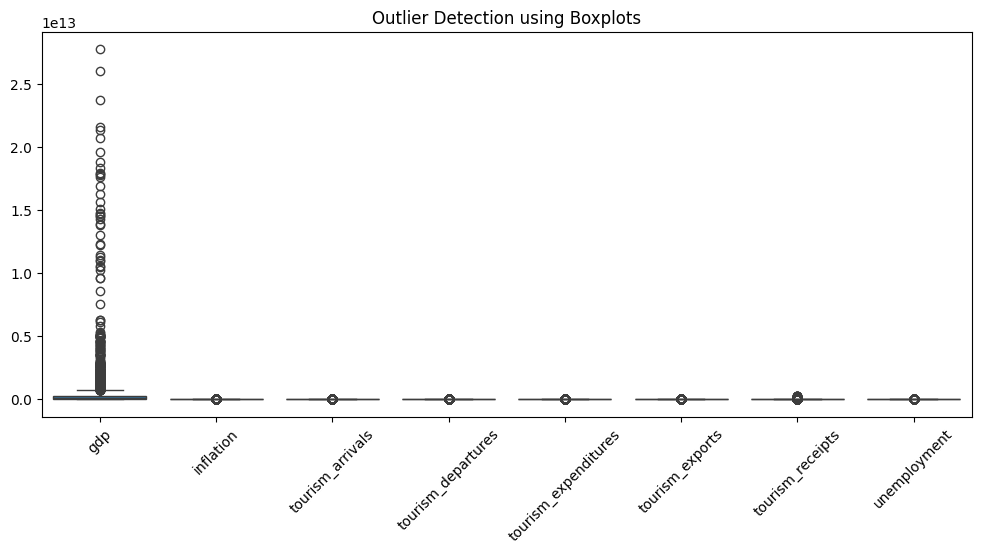

In [31]:
plt.figure(figsize=(12,5))
sns.boxplot(data=df1[num_cols])
plt.xticks(rotation=45)
plt.title("Outlier Detection using Boxplots")
plt.show()

In [32]:
## these are not the actual outliers, so there is no need to handle them.

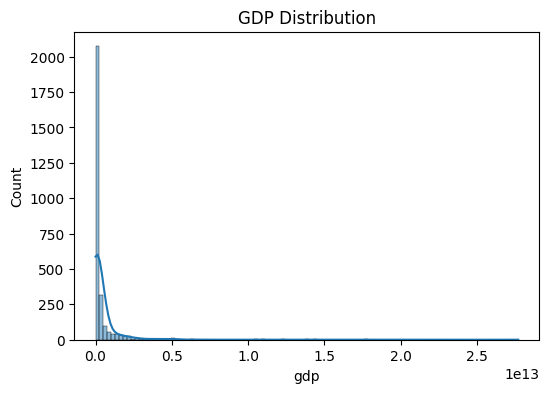

In [33]:
plt.figure(figsize=(6,4))
sns.histplot(df1['gdp'], kde=True)
plt.title('GDP Distribution')
plt.show()

# Evolution of Tourism Arrivals Over Time

In [34]:
global_arrivals = df1.groupby('year')['tourism_arrivals'].agg(['sum'])
global_arrivals

,sum
year,
1999,1.059258e+09
2000,1.110346e+09
2001,1.085577e+09
2002,1.093644e+09
2003,1.074139e+09
2004,1.168031e+09
2005,1.217957e+09
2006,1.377177e+09
2007,1.419615e+09


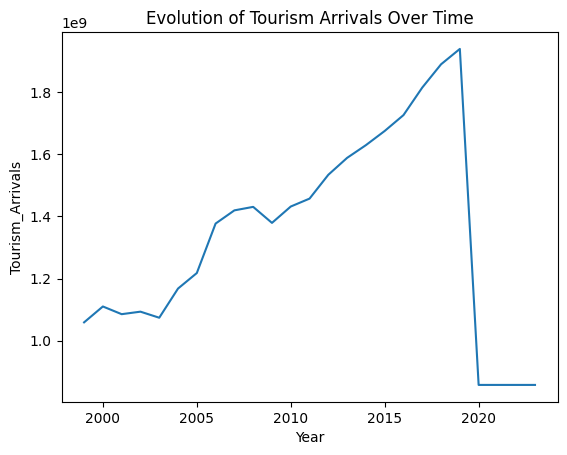

In [35]:
plt.plot(global_arrivals.index,global_arrivals.values)
plt.xlabel('Year')
plt.ylabel("Tourism_Arrivals")
plt.title("Evolution of Tourism Arrivals Over Time")
plt.show()

# Countries with the Highest Economic Reliance on Tourism

In [36]:
uni_1 = df1.groupby('country')['tourism_exports'].agg(['mean'])
uni_1.sort_values(by = 'mean',inplace = True,ascending = False)
top_uni_1 = uni_1.head(10)
top_uni_1

,mean
country,
Maldives,81.359584
"Macao SAR, China",77.956680
Vanuatu,64.943193
Sao Tome and Principe,58.114930
Samoa,54.234608
Albania,53.294996
Dominican Republic,40.746876
Tuvalu,40.052943
Fiji,39.479831


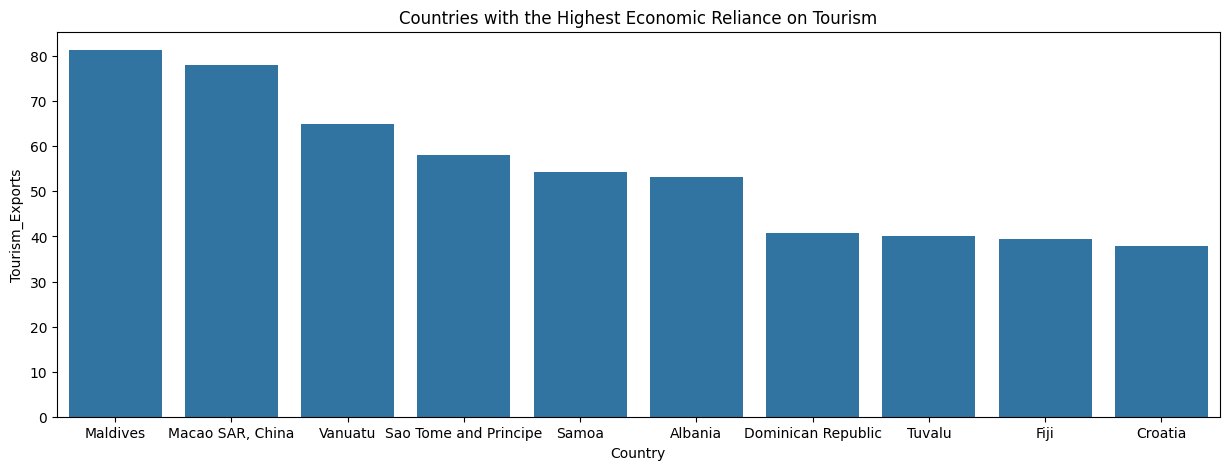

In [37]:
plt.figure(figsize = (15,5))
sns.barplot(data = top_uni_1,x = top_uni_1.index,y = 'mean')
plt.title('Countries with the Highest Economic Reliance on Tourism')
plt.xlabel('Country')
plt.ylabel('Tourism_Exports')
plt.show()

# Top Budget-Friendly Travel Destinations

In [39]:
gb_2 = df1.groupby('country')[['tourism_arrivals','tourism_receipts']].agg(['mean'])
gb_2.columns = ['tourism_arrivals_mean','tourism_receipts_mean']
gb_2

,tourism_arrivals_mean,tourism_receipts_mean
country,,
Albania,2.461760e+06,1.364160e+09
Algeria,1.605480e+06,3.104600e+08
Armenia,6.748400e+05,5.757200e+08
Australia,5.534120e+06,2.745540e+10
Austria,2.166480e+07,1.800198e+10
...,...,...
Uruguay,2.781080e+06,1.495040e+09
Uzbekistan,2.390720e+06,4.388600e+08
Vanuatu,1.951120e+05,1.701600e+08


In [40]:
gb_2_1 = gb_2[gb_2['tourism_arrivals_mean']>gb_2['tourism_arrivals_mean'].quantile(0.75)]
gb_2_1['budget_friendly'] = gb_2_1['tourism_arrivals_mean']/gb_2_1['tourism_receipts_mean']
gb_2_1.sort_values(by = 'budget_friendly',ascending = False,inplace = True)
gb_2_1

C:\Users\megha\AppData\Local\Temp\ipykernel_31148\1619456683.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gb_2_1['budget_friendly'] = gb_2_1['tourism_arrivals_mean']/gb_2_1['tourism_receipts_mean']
C:\Users\megha\AppData\Local\Temp\ipykernel_31148\1619456683.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gb_2_1.sort_values(by = 'budget_friendly',ascending = False,inplace = True)


,tourism_arrivals_mean,tourism_receipts_mean,budget_friendly
country,,,
Poland,7.250520e+07,9.743640e+09,0.007441
Slovak Republic,1.359252e+07,1.911360e+09,0.007111
Hungary,3.991796e+07,5.887640e+09,0.006780
Mexico,8.586944e+07,1.406832e+10,0.006104
Ukraine,1.592800e+07,2.728520e+09,0.005838
Croatia,4.413160e+07,7.728016e+09,0.005711
Czechia,2.740232e+07,6.162520e+09,0.004447
China,1.083298e+08,2.587516e+10,0.004187
Denmark,2.438124e+07,6.615920e+09,0.003685


In [41]:
gb_2_1_top = gb_2_1.head(10)

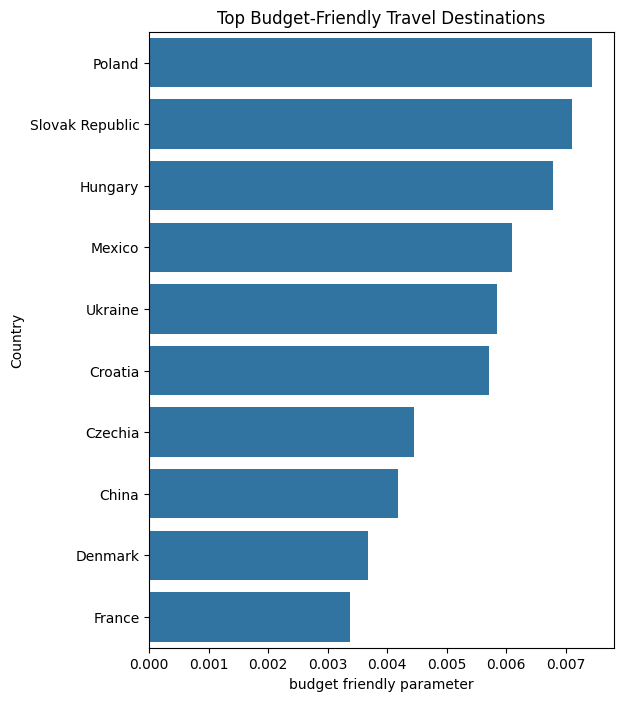

In [42]:
plt.figure(figsize = (6,8))
sns.barplot(data = gb_2_1_top,y = gb_2_1_top.index,x = 'budget_friendly')
plt.ylabel('Country')
plt.xlabel('budget friendly parameter')
plt.title('Top Budget-Friendly Travel Destinations')
plt.show()

# Continent wise Tourism Arrivals

In [43]:
df1['country'].unique()

array(['Albania', 'Algeria', 'Armenia', 'Australia', 'Austria',
       'Azerbaijan', 'Bahrain', 'Bangladesh', 'Belarus', 'Belgium',
       'Bhutan', 'Bolivia', 'Brazil', 'Bulgaria', 'Burundi', 'Cambodia',
       'Canada', 'Chile', 'China', 'Colombia', 'Congo, Dem. Rep.',
       'Congo, Rep.', 'Costa Rica', 'Croatia', 'Cyprus', 'Czechia',
       'Denmark', 'Dominican Republic', 'Ecuador', 'Egypt, Arab Rep.',
       'El Salvador', 'Estonia', 'Eswatini', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia, The', 'Georgia', 'Germany', 'Greece',
       'Guatemala', 'Honduras', 'Hong Kong SAR, China', 'Hungary',
       'Iceland', 'India', 'Indonesia', 'Iran, Islamic Rep.', 'Ireland',
       'Israel', 'Italy', 'Japan', 'Jordan', 'Kazakhstan', 'Korea, Rep.',
       'Kuwait', 'Kyrgyz Republic', 'Lao PDR', 'Latvia', 'Lithuania',
       'Luxembourg', 'Macao SAR, China', 'Malaysia', 'Maldives', 'Malta',
       'Mauritius', 'Mexico', 'Moldova', 'Morocco', 'Nepal',
       'Netherlands', 'New Caledo

In [44]:
continent_map = {"Africa": ["Algeria", "Burundi", "Congo, Dem. Rep.", "Congo, Rep.",
        "Egypt, Arab Rep.", "Eswatini", "Gabon", "Gambia, The",
        "Morocco", "Sao Tome and Principe", "Sierra Leone",
        "Tunisia", "Uganda", "Zimbabwe"],

    "Asia": ["Armenia", "Azerbaijan", "Bahrain", "Bangladesh", "Bhutan",
        "Cambodia", "China", "Hong Kong SAR, China", "India",
        "Indonesia", "Iran, Islamic Rep.", "Israel", "Japan",
        "Jordan", "Kazakhstan", "Korea, Rep.", "Kuwait",
        "Kyrgyz Republic", "Lao PDR", "Malaysia", "Maldives",
        "Nepal", "Oman", "Philippines", "Sri Lanka",
        "Syrian Arab Republic", "Tajikistan", "Thailand",
        "Turkiye", "Uzbekistan"],

    "Europe": ["Albania", "Austria", "Belarus", "Belgium", "Bulgaria",
        "Croatia", "Cyprus", "Czechia", "Denmark", "Estonia",
        "Finland", "France", "Germany", "Greece", "Hungary",
        "Iceland", "Ireland", "Italy", "Latvia", "Lithuania",
        "Luxembourg", "Malta", "Moldova", "Netherlands", "Norway",
        "Poland", "Portugal", "Romania", "Russian Federation",
        "Slovak Republic", "Slovenia", "Sweden", "Switzerland",
        "Ukraine"],

    "North America": ["Canada", "Costa Rica", "Dominican Republic", "El Salvador",
        "Guatemala", "Honduras", "Mexico", "Nicaragua", "Panama",
        "Trinidad and Tobago", "United States"],

    "South America": ["Bolivia", "Brazil", "Chile", "Colombia", "Ecuador",
        "Paraguay", "Peru", "Uruguay", "Venezuela, RB"],

    "Australia": ["Australia", "Fiji", "New Caledonia", "New Zealand",
        "Papua New Guinea", "Samoa", "Tuvalu", "Vanuatu"]}

In [45]:
country_to_continent = {country: continent for continent, countries in continent_map.items() for country in countries}

In [46]:
df1['continent'] = df1['country'].map(country_to_continent)

C:\Users\megha\AppData\Local\Temp\ipykernel_31148\3814646847.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['continent'] = df1['country'].map(country_to_continent)


In [47]:
df1

,country,country_code,year,tourism_receipts,tourism_arrivals,tourism_exports,tourism_departures,tourism_expenditures,gdp,inflation,unemployment,continent
5,Albania,ALB,1999,218000000.0,371000.0,55.969191,955000.0,3.699007,3.212122e+09,0.389438,18.4000,Europe
271,Albania,ALB,2000,398000000.0,317000.0,71.776375,955000.0,21.476709,3.480355e+09,0.050018,16.8000,Europe
537,Albania,ALB,2001,451000000.0,354000.0,68.520207,955000.0,16.864146,3.922101e+09,3.107588,16.4000,Europe
803,Albania,ALB,2002,492000000.0,470000.0,73.743218,1303000.0,21.121635,4.348068e+09,7.770526,4.6150,Europe
1069,Albania,ALB,2003,537000000.0,557000.0,63.417407,1350000.0,22.374900,5.611496e+09,0.484003,15.0000,Europe
...,...,...,...,...,...,...,...,...,...,...,...,...
5585,Zimbabwe,ZWE,2019,285000000.0,2294000.0,5.411115,3275000.0,4.760583,2.571741e+10,255.304991,7.3730,Africa
5851,Zimbabwe,ZWE,2020,66000000.0,639000.0,1.253967,3275000.0,2.860109,2.686794e+10,557.201817,8.4565,Africa
6117,Zimbabwe,ZWE,2021,66000000.0,639000.0,1.253967,3275000.0,2.860109,2.724052e+10,98.546105,9.5400,Africa
6383,Zimbabwe,ZWE,2022,66000000.0,639000.0,1.253967,3275000.0,2.860109,3.278975e+10,104.705171,10.0870,Africa


In [48]:
continent_year = df1.groupby(["year", "continent"])["tourism_arrivals"].sum().reset_index()
continent_year

,year,continent,tourism_arrivals
0,1999,Africa,1.890180e+07
1,1999,Asia,1.469737e+08
2,1999,Australia,7.043100e+06
3,1999,Europe,6.055280e+08
4,1999,North America,2.325430e+08
...,...,...,...
145,2023,Asia,1.627020e+08
146,2023,Australia,3.171900e+06
147,2023,Europe,4.816790e+08
148,2023,North America,1.357215e+08


In [49]:
dt = continent_year.groupby('continent')['tourism_arrivals'].agg(['mean'])
dt

,mean
continent,
Africa,2.972997e+07
Asia,2.946900e+08
Australia,9.046324e+06
Europe,6.778457e+08
North America,2.552999e+08
South America,2.367733e+07


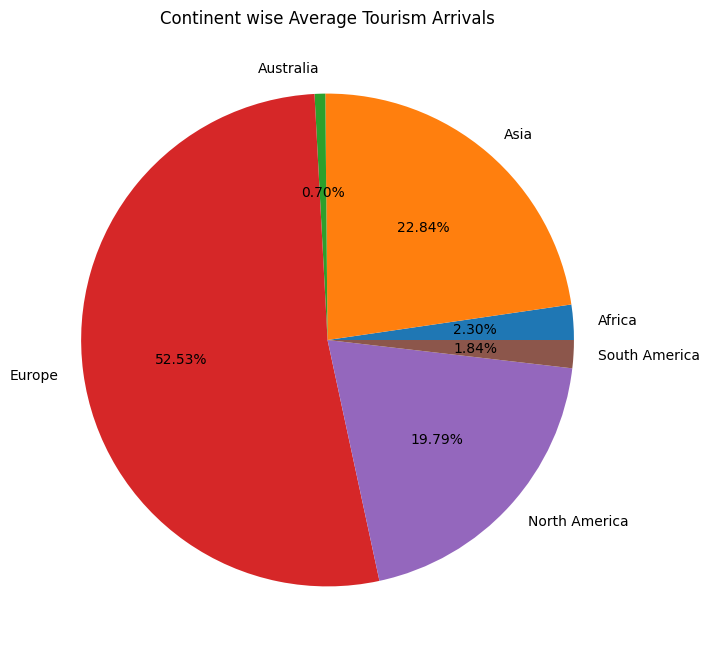

In [50]:
plt.figure(figsize = (8,8))
plt.pie(x = dt['mean'],labels = dt.index,autopct = '%.2f%%')
plt.title('Continent wise Average Tourism Arrivals')
plt.show()

In [51]:
cy2019 = continent_year[continent_year['year'] == 2019]
cy2019

,year,continent,tourism_arrivals
120,2019,Africa,4.505640e+07
121,2019,Asia,5.196490e+08
122,2019,Australia,1.510460e+07
123,2019,Europe,9.186480e+08
124,2019,North America,3.181730e+08
125,2019,South America,3.321400e+07


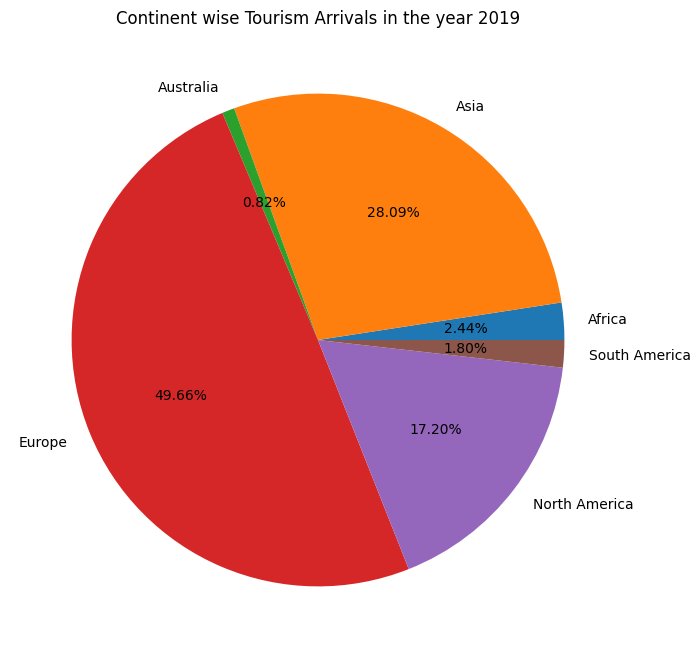

In [52]:
plt.figure(figsize = (8,8))
plt.pie(x = cy2019['tourism_arrivals'],labels = cy2019['continent'],autopct = '%.2f%%')
plt.title('Continent wise Tourism Arrivals in the year 2019')
plt.show()

# Correlation between the Numerical Columns

In [53]:
df3 = df1
df3

,country,country_code,year,tourism_receipts,tourism_arrivals,tourism_exports,tourism_departures,tourism_expenditures,gdp,inflation,unemployment,continent
5,Albania,ALB,1999,218000000.0,371000.0,55.969191,955000.0,3.699007,3.212122e+09,0.389438,18.4000,Europe
271,Albania,ALB,2000,398000000.0,317000.0,71.776375,955000.0,21.476709,3.480355e+09,0.050018,16.8000,Europe
537,Albania,ALB,2001,451000000.0,354000.0,68.520207,955000.0,16.864146,3.922101e+09,3.107588,16.4000,Europe
803,Albania,ALB,2002,492000000.0,470000.0,73.743218,1303000.0,21.121635,4.348068e+09,7.770526,4.6150,Europe
1069,Albania,ALB,2003,537000000.0,557000.0,63.417407,1350000.0,22.374900,5.611496e+09,0.484003,15.0000,Europe
...,...,...,...,...,...,...,...,...,...,...,...,...
5585,Zimbabwe,ZWE,2019,285000000.0,2294000.0,5.411115,3275000.0,4.760583,2.571741e+10,255.304991,7.3730,Africa
5851,Zimbabwe,ZWE,2020,66000000.0,639000.0,1.253967,3275000.0,2.860109,2.686794e+10,557.201817,8.4565,Africa
6117,Zimbabwe,ZWE,2021,66000000.0,639000.0,1.253967,3275000.0,2.860109,2.724052e+10,98.546105,9.5400,Africa
6383,Zimbabwe,ZWE,2022,66000000.0,639000.0,1.253967,3275000.0,2.860109,3.278975e+10,104.705171,10.0870,Africa


In [54]:
exclude_cols = ['country','country_code','year','continent']
value_cols = df3.columns.difference(exclude_cols)
value_cols

Index(['gdp', 'inflation', 'tourism_arrivals', 'tourism_departures',
       'tourism_expenditures', 'tourism_exports', 'tourism_receipts',
       'unemployment'],
      dtype='object')

### We have detrended the series by taking the difference between the rows of consective years

In [55]:
df3 = df3.sort_values(['country','year'])

for col in value_cols:
    df3[col] = df3.groupby('country')[col].diff()

In [56]:
df3

,country,country_code,year,tourism_receipts,tourism_arrivals,tourism_exports,tourism_departures,tourism_expenditures,gdp,inflation,unemployment,continent
5,Albania,ALB,1999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Europe
271,Albania,ALB,2000,180000000.0,-54000.0,15.807184,0.0,17.777702,2.682336e+08,-0.339420,-1.6000,Europe
537,Albania,ALB,2001,53000000.0,37000.0,-3.256168,0.0,-4.612562,4.417455e+08,3.057570,-0.4000,Europe
803,Albania,ALB,2002,41000000.0,116000.0,5.223011,348000.0,4.257489,4.259674e+08,4.662938,-11.7850,Europe
1069,Albania,ALB,2003,45000000.0,87000.0,-10.325810,47000.0,1.253265,1.263428e+09,-7.286523,10.3850,Europe
...,...,...,...,...,...,...,...,...,...,...,...,...
5585,Zimbabwe,ZWE,2019,94000000.0,-286000.0,1.722550,987000.0,1.240655,-8.438660e+09,244.686125,0.5198,Africa
5851,Zimbabwe,ZWE,2020,-219000000.0,-1655000.0,-4.157148,0.0,-1.900474,1.150527e+09,301.896827,1.0835,Africa
6117,Zimbabwe,ZWE,2021,0.0,0.0,0.000000,0.0,0.000000,3.725787e+08,-458.655712,1.0835,Africa
6383,Zimbabwe,ZWE,2022,0.0,0.0,0.000000,0.0,0.000000,5.549237e+09,6.159066,0.5470,Africa


### We have done the standardization scaling technique

In [57]:
df3[value_cols] = (df3.groupby('country')[value_cols].transform(lambda x: (x - x.mean()) / x.std()))

In [58]:
df3.dropna(axis = 0,inplace = True)

In [59]:
df3.reset_index(drop = True,inplace = True)

In [60]:
df3

,country,country_code,year,tourism_receipts,tourism_arrivals,tourism_exports,tourism_departures,tourism_expenditures,gdp,inflation,unemployment,continent
0,Albania,ALB,2000,0.435580,-0.173723,2.560419,-0.114616,3.541516,-0.443938,-0.228673,-0.315919,Europe
1,Albania,ALB,2001,0.032652,-0.067831,-0.372406,-0.114616,-1.031359,-0.310915,1.260831,-0.026767,Europe
2,Albania,ALB,2002,-0.005420,0.024097,0.932084,0.375791,0.780215,-0.323011,1.964749,-2.770097,Europe
3,Albania,ALB,2003,0.007271,-0.009649,-1.460043,-0.048383,0.166648,0.319030,-3.274825,2.571988,Europe
4,Albania,ALB,2004,0.559314,-0.008485,-0.322008,0.370154,0.064253,0.556509,0.707668,-0.074959,Europe
...,...,...,...,...,...,...,...,...,...,...,...,...
2467,Zimbabwe,ZWE,2019,1.112925,-0.485161,1.670900,1.672347,1.423847,-1.257350,1.918996,0.828182,Africa
2468,Zimbabwe,ZWE,2020,-2.382181,-3.519704,-3.339216,-0.237340,-1.983104,-0.004142,2.375588,2.055755,Africa
2469,Zimbabwe,ZWE,2021,0.063277,0.148790,0.203107,-0.237340,0.078200,-0.105812,-3.694287,2.055755,Africa
2470,Zimbabwe,ZWE,2022,0.063277,0.148790,0.203107,-0.237340,0.078200,0.570724,0.015342,0.887415,Africa


In [61]:
df3.corr(numeric_only = True)

,year,tourism_receipts,tourism_arrivals,tourism_exports,tourism_departures,tourism_expenditures,gdp,inflation,unemployment
year,1.000000,-0.212242,-0.150063,-0.049568,-0.165394,-0.027052,0.064760,0.098646,0.008573
tourism_receipts,-0.212242,1.000000,0.590926,0.678384,0.446928,0.434446,0.344819,0.053214,-0.221469
tourism_arrivals,-0.150063,0.590926,1.000000,0.462386,0.565404,0.346583,0.215718,0.063580,-0.221024
tourism_exports,-0.049568,0.678384,0.462386,1.000000,0.337401,0.583484,0.049323,-0.036463,-0.126412
tourism_departures,-0.165394,0.446928,0.565404,0.337401,1.000000,0.347749,0.196687,0.054988,-0.154456
tourism_expenditures,-0.027052,0.434446,0.346583,0.583484,0.347749,1.000000,0.063016,-0.073970,-0.065669
gdp,0.064760,0.344819,0.215718,0.049323,0.196687,0.063016,1.000000,0.085632,-0.217118
inflation,0.098646,0.053214,0.063580,-0.036463,0.054988,-0.073970,0.085632,1.000000,-0.179943
unemployment,0.008573,-0.221469,-0.221024,-0.126412,-0.154456,-0.065669,-0.217118,-0.179943,1.000000


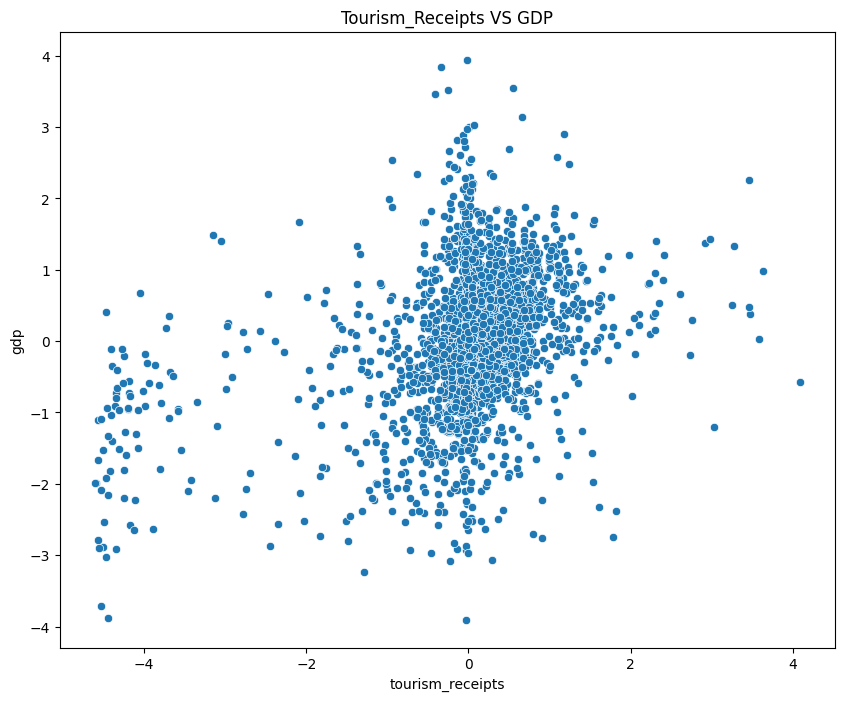

In [62]:
plt.figure(figsize = (10,8))
sns.scatterplot(data = df3,x = 'tourism_receipts',y = 'gdp')
plt.title('Tourism_Receipts VS GDP')
plt.show()

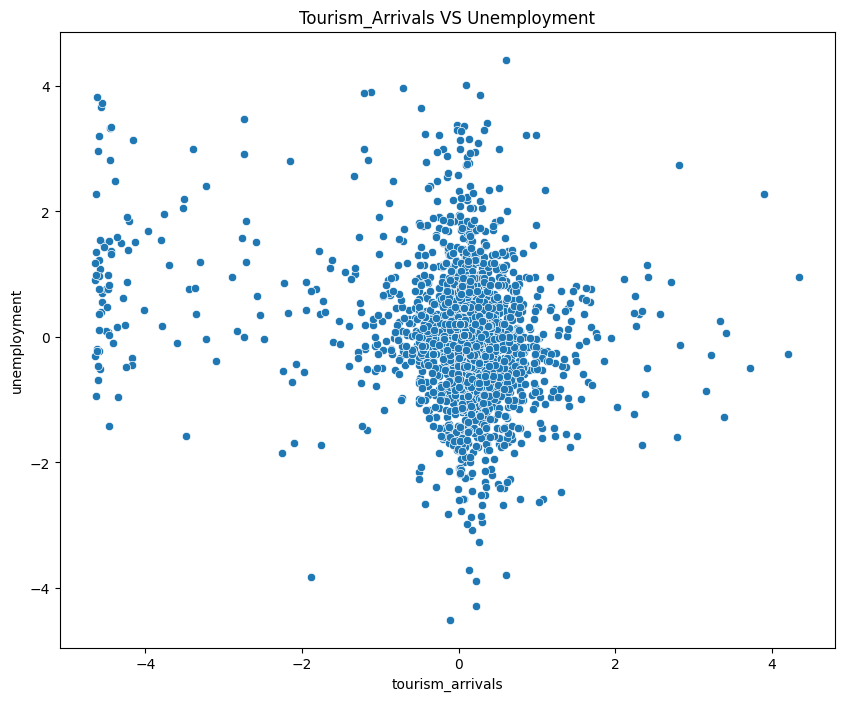

In [63]:
plt.figure(figsize = (10,8))
sns.scatterplot(data = df3,x = 'tourism_arrivals',y = 'unemployment')
plt.title('Tourism_Arrivals VS Unemployment')
plt.show()

<Axes: >

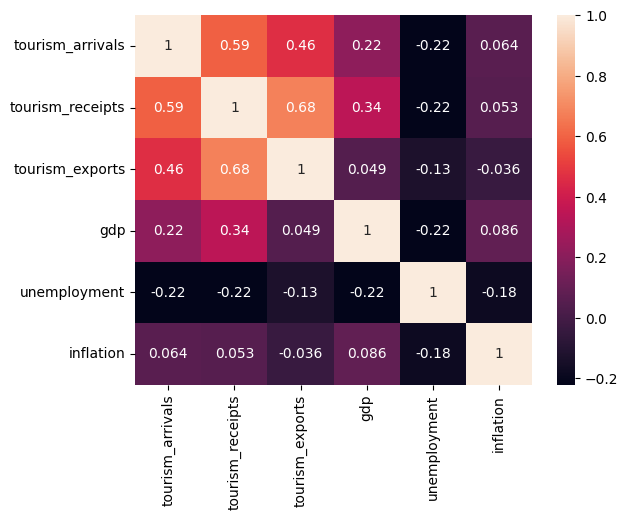

In [64]:
sns.heatmap(df3[['tourism_arrivals','tourism_receipts','tourism_exports','gdp','unemployment','inflation']].corr(),annot = True)

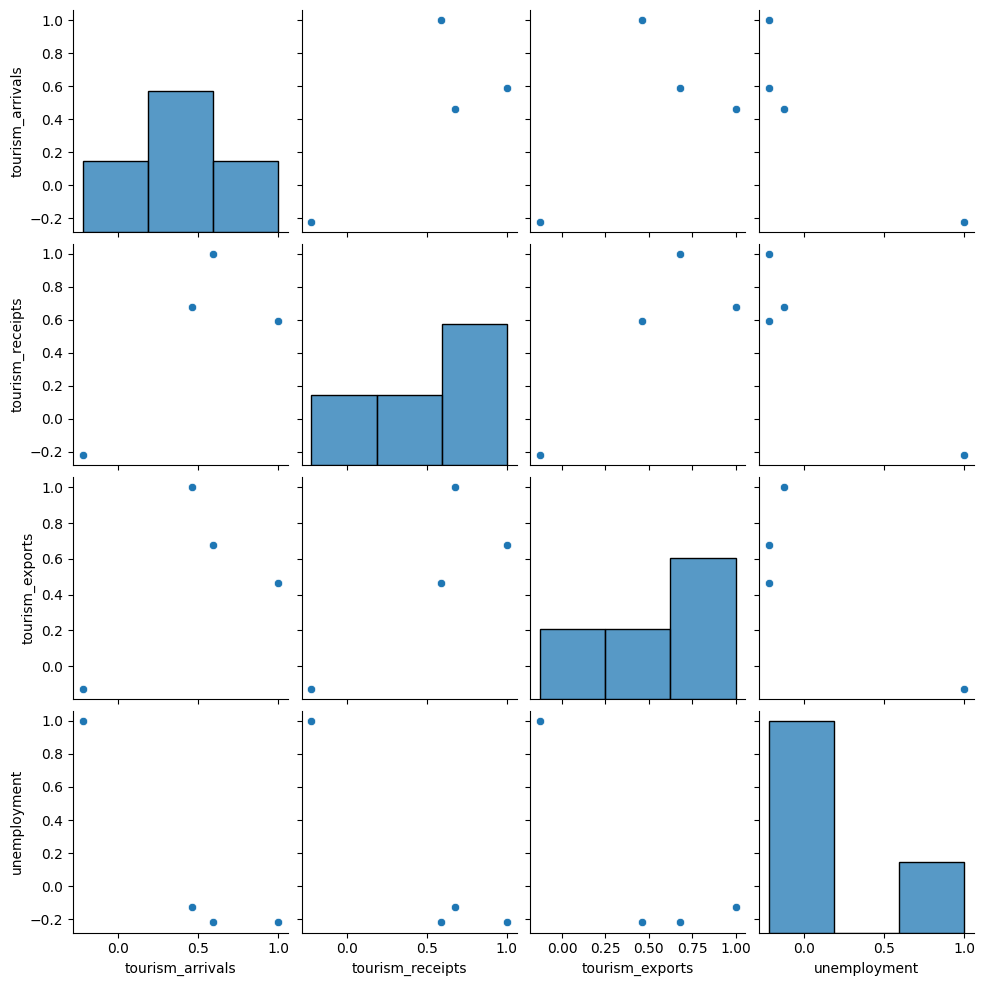

In [65]:
sns.pairplot(df3[['tourism_arrivals','tourism_receipts','tourism_exports','unemployment']].corr())

In [66]:
df1.to_csv("Cleaned.csv", index=False)

In [67]:
df3.to_csv('Scaled.csv',index = False)